<a href="https://colab.research.google.com/github/atlas-github/cimbclicks_analysis/blob/master/cimbclicks_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [0]:
import requests
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

#Select target page

In [336]:
url = "https://forum.lowyat.net/topic/4828500"
response = requests.get(url)
response

<Response [200]>

#Scrape comments

In [337]:
soup = BeautifulSoup(response.text, "html.parser")
comments = soup.findAll("div",{'class':"postcolor post_text"})
comments_temp = list(comments)
comments_list = []

for i in range(len(comments)):
  comments_list.append(comments[i].get_text())

comments_list

['    Bloody useless Octopus Bank.Early they said the apps is down and ask us to use Web version, now the web version is down.  I want to transfer money right now also cannot.This post has been edited by cringe: Aug 26 2019, 10:39 PM ',
 'Lod incoming ',
 'could it be another security issue? jeng jeng jeng.gif ',
 "QUOTE(Lyu @ Aug 26 2019, 10:38 PM)Lod incomingWhat LOD. I'm Getting frustrated with this bank. ",
 'Yup. Progressively getting worse with a major acceleration this year. ',
 "QUOTE(cringe @ Aug 26 2019, 10:42 PM)What LOD. I'm Getting frustrated with this bank.Y limited thee self to one...? ",
 'QUOTE(Lyu @ Aug 26 2019, 10:38 PM)Lod incomingLyu, you applied CC already? ',
 "QUOTE(Baconateer @ Aug 26 2019, 10:42 PM)could it be another security issue? jeng jeng jeng.gifUsing KLIA's system. Plot twist. ",
 'Its been down since morning. Only got to use the web version at abt 7+. Trf my money out to rhb in case app down again. ',
 'Ive said it again n againMb2u > all ',
 'one is t

#Scrape usernames

In [338]:
soup2 = BeautifulSoup(response.text, "html.parser")
names = soup2.findAll("span", {"class": "normalname"})
names_temp = list(names)
names_list = []

for i in range(len(names)):
  names_list.append(names[i].get_text())

names_list

['TScringe',
 'Lyu',
 'Baconateer',
 'TScringe',
 'thesoothsayer',
 'Lyu',
 'JoeK',
 'sp6068',
 'CWW88',
 'ketupatlazat',
 'alexkos',
 'TScringe',
 'alexkos',
 'KcX35',
 'Lyu',
 'judehow',
 'robert82',
 'JoeK',
 'TScringe',
 'robert82']

#Scrape quotes

In [339]:
soup4 = BeautifulSoup(response.text, "html.parser")
quote_who = soup4.findAll("div", {"class": "quotetop"})
quote_who_temp = list(quote_who)
quote_who_list = []

for i in range(len(quote_who)):
  quote_who_list.append(quote_who[i].get_text())

quote_who_list

['QUOTE(Lyu @ Aug 26 2019, 10:38 PM)',
 'QUOTE(cringe @ Aug 26 2019, 10:42 PM)',
 'QUOTE(Lyu @ Aug 26 2019, 10:38 PM)',
 'QUOTE(Baconateer @ Aug 26 2019, 10:42 PM)',
 'QUOTE(CWW88 @ Aug 26 2019, 10:44 PM)',
 'QUOTE(ketupatlazat @ Aug 26 2019, 10:44 PM)',
 'QUOTE(cringe @ Aug 26 2019, 10:45 PM)',
 'QUOTE(JoeK @ Aug 26 2019, 10:43 PM)',
 'QUOTE(cringe @ Aug 26 2019, 10:37 PM)',
 'QUOTE(Lyu @ Aug 26 2019, 10:51 PM)']

In [340]:
soup5 = BeautifulSoup(response.text, "html.parser")
quote_what = soup5.findAll("div", {"class": "quotemain"})
quote_what_temp = list(quote_what)
quote_what_list = []

for i in range(len(quote_what)):
  quote_what_list.append(quote_what[i].get_text())

quote_what_list

['Lod incoming',
 "What LOD. I'm Getting frustrated with this bank.",
 'Lod incoming',
 'could it be another security issue? jeng jeng jeng.gif',
 'Its been down since morning. Only got to use the web version at abt 7+. Trf my money out to rhb in case app down again.',
 'Ive said it again n againMb2u > all',
 "The only reason i'm using CIMB is because my salary credited to CIMB and I forgot to transfer my money to other bank.",
 'Lyu, you applied CC already?',
 '\xa0 \xa0 \xa0  Bloody useless Octopus Bank.Early they said the apps is down and ask us to use Web version, now the web version is down.  I want to transfer money right now also cannot.',
 'Not yet... Figured out HLB got good cashback But my area no HLB']

In [341]:
compiled_quote = list(zip(quote_who_list, quote_what_list))
quote_dataframe = pd.DataFrame(compiled_quote, columns = ["Person_Quoted", "Quote_Content"])
quote_dataframe['Person_Quoted'] = quote_dataframe['Person_Quoted'].str.replace(')', '')
quote_dataframe = quote_dataframe.drop_duplicates()
quote_dataframe

,Person_Quoted,Quote_Content
0,"QUOTE(Lyu @ Aug 26 2019, 10:38 PM",Lod incoming
1,"QUOTE(cringe @ Aug 26 2019, 10:42 PM",What LOD. I'm Getting frustrated with this bank.
3,"QUOTE(Baconateer @ Aug 26 2019, 10:42 PM",could it be another security issue? jeng jeng ...
4,"QUOTE(CWW88 @ Aug 26 2019, 10:44 PM",Its been down since morning. Only got to use t...
5,"QUOTE(ketupatlazat @ Aug 26 2019, 10:44 PM",Ive said it again n againMb2u > all
6,"QUOTE(cringe @ Aug 26 2019, 10:45 PM",The only reason i'm using CIMB is because my s...
7,"QUOTE(JoeK @ Aug 26 2019, 10:43 PM","Lyu, you applied CC already?"
8,"QUOTE(cringe @ Aug 26 2019, 10:37 PM",Bloody useless Octopus Bank.Early they ...
9,"QUOTE(Lyu @ Aug 26 2019, 10:51 PM",Not yet... Figured out HLB got good cashback B...


#Merge usernames and comments into a table

In [342]:
compiled_list = list(zip(names_list, comments_list))
dataframe = pd.DataFrame(compiled_list, columns = ["Person", "Comment"])
dataframe

,Person,Comment
0,TScringe,Bloody useless Octopus Bank.Early they sai...
1,Lyu,Lod incoming
2,Baconateer,could it be another security issue? jeng jeng ...
3,TScringe,"QUOTE(Lyu @ Aug 26 2019, 10:38 PM)Lod incoming..."
4,thesoothsayer,Yup. Progressively getting worse with a major ...
5,Lyu,"QUOTE(cringe @ Aug 26 2019, 10:42 PM)What LOD...."
6,JoeK,"QUOTE(Lyu @ Aug 26 2019, 10:38 PM)Lod incoming..."
7,sp6068,"QUOTE(Baconateer @ Aug 26 2019, 10:42 PM)could..."
8,CWW88,Its been down since morning. Only got to use t...
9,ketupatlazat,Ive said it again n againMb2u > all


In [343]:
dataframe[['Person_Quoted', 'Comment']] = dataframe['Comment'].str.split(")", n = 1, expand = True)
dataframe

,Person,Comment,Person_Quoted
0,TScringe,None,Bloody useless Octopus Bank.Early they sai...
1,Lyu,None,Lod incoming
2,Baconateer,None,could it be another security issue? jeng jeng ...
3,TScringe,Lod incomingWhat LOD. I'm Getting frustrated w...,"QUOTE(Lyu @ Aug 26 2019, 10:38 PM"
4,thesoothsayer,None,Yup. Progressively getting worse with a major ...
5,Lyu,What LOD. I'm Getting frustrated with this ban...,"QUOTE(cringe @ Aug 26 2019, 10:42 PM"
6,JoeK,"Lod incomingLyu, you applied CC already?","QUOTE(Lyu @ Aug 26 2019, 10:38 PM"
7,sp6068,could it be another security issue? jeng jeng ...,"QUOTE(Baconateer @ Aug 26 2019, 10:42 PM"
8,CWW88,None,Its been down since morning. Only got to use t...
9,ketupatlazat,None,Ive said it again n againMb2u > all


#Scrape all pages

In [0]:
pages = ["/+0", "/+20", "/+40", "/+60"]
comments_list = []
names_list = []

for i in range(0, len(pages)):
  url = "https://forum.lowyat.net/topic/4828500"+pages[i]
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")
  comments = soup.findAll("div",{'class':"postcolor post_text"})
  comments_temp = list(comments)
     
  for i in range(len(comments_temp)):
    comments_list.append(comments_temp[i].get_text())
  
  names = soup.findAll("span", {"class": "normalname"})
  names_temp = list(names)
  
  for i in range(len(names_temp)):
    names_list.append(names_temp[i].get_text())
  
compiled_list = list(zip(names_list, comments_list))

In [345]:
dataframe = pd.DataFrame(compiled_list, columns = ["Person", "Comment"])
dataframe

,Person,Comment
0,TScringe,Bloody useless Octopus Bank.Early they sai...
1,Lyu,Lod incoming
2,Baconateer,could it be another security issue? jeng jeng ...
3,TScringe,"QUOTE(Lyu @ Aug 26 2019, 10:38 PM)Lod incoming..."
4,thesoothsayer,Yup. Progressively getting worse with a major ...
...,...,...
58,lrtss18,say no to cimbeng
59,POYOZER,Omg. My bills still pending.
60,andise,still slow until today
61,graphidz,Remember not to keep all your money in one ban...


#Sentiment Analysis

In [346]:
!pip install afinn
from afinn import Afinn
af = Afinn()

In [0]:
sentiment_scores = []

for i in range(len(dataframe)):
  sentiment_scores.append(af.score(dataframe.iloc[i, 1]))

sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [348]:
sentiment_df = pd.DataFrame(sentiment_scores, columns = {'Sentiment_Scores'})
category_df = pd.DataFrame(sentiment_category, columns = {"Sentiment Category"})
sentiment_df
category_df
df = pd.concat([dataframe, sentiment_df, category_df], axis = 1)
df['Sentiment_Scores'] = df.Sentiment_Scores.astype('float')
df

,Person,Comment,Sentiment_Scores,Sentiment Category
0,TScringe,Bloody useless Octopus Bank.Early they sai...,-4.0,negative
1,Lyu,Lod incoming,0.0,neutral
2,Baconateer,could it be another security issue? jeng jeng ...,0.0,neutral
3,TScringe,"QUOTE(Lyu @ Aug 26 2019, 10:38 PM)Lod incoming...",-2.0,negative
4,thesoothsayer,Yup. Progressively getting worse with a major ...,-3.0,negative
...,...,...,...,...
58,lrtss18,say no to cimbeng,-1.0,negative
59,POYOZER,Omg. My bills still pending.,0.0,neutral
60,andise,still slow until today,0.0,neutral
61,graphidz,Remember not to keep all your money in one ban...,-2.0,negative


In [0]:
df.to_csv("complaints.csv")
from google.colab import files
files.download("complaints.csv")

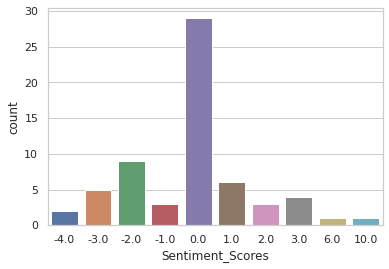

In [350]:
import seaborn as sns
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Sentiment_Scores', data = df)

In [351]:
df['Sentiment_Scores'].value_counts()

 0.0     29
-2.0      9
 1.0      6
-3.0      5
 3.0      4
 2.0      3
-1.0      3
-4.0      2
 10.0     1
 6.0      1
Name: Sentiment_Scores, dtype: int64

In [352]:
negative = df.loc[df['Sentiment_Scores'] == -2.0]
negative

,Person,Comment,Sentiment_Scores,Sentiment Category
3,TScringe,"QUOTE(Lyu @ Aug 26 2019, 10:38 PM)Lod incoming...",-2.0,negative
16,robert82,"eh , damn bodo this cimb",-2.0,negative
21,TScringe,"QUOTE(robert82 @ Aug 27 2019, 09:23 AM)topkek ...",-2.0,negative
22,robert82,"QUOTE(cringe @ Aug 27 2019, 09:26 AM)I see the...",-2.0,negative
46,Joe_Longgo,That is why my main bank is Public Bank. PBE o...,-2.0,negative
48,TScringe,"QUOTE(Joe_Longgo @ Aug 27 2019, 02:07 PM)That ...",-2.0,negative
50,Joe_Longgo,"QUOTE(cringe @ Aug 27 2019, 02:09 PM)Lack of A...",-2.0,negative
55,xSean,"QUOTE(Joe_Longgo @ Aug 27 2019, 02:07 PM)That ...",-2.0,negative
61,graphidz,Remember not to keep all your money in one ban...,-2.0,negative


In [0]:
negative.to_csv("negative.csv")
files.download("negative.csv")

In [354]:
neutral = df.loc[df['Sentiment_Scores'] == 0.0]
neutral

,Person,Comment,Sentiment_Scores,Sentiment Category
1,Lyu,Lod incoming,0.0,neutral
2,Baconateer,could it be another security issue? jeng jeng ...,0.0,neutral
6,JoeK,"QUOTE(Lyu @ Aug 26 2019, 10:38 PM)Lod incoming...",0.0,neutral
7,sp6068,"QUOTE(Baconateer @ Aug 26 2019, 10:42 PM)could...",0.0,neutral
8,CWW88,Its been down since morning. Only got to use t...,0.0,neutral
9,ketupatlazat,Ive said it again n againMb2u > all,0.0,neutral
10,alexkos,"one is tiger bank, one is otopus bank.same spe...",0.0,neutral
18,TScringe,CIMB is down again.,0.0,neutral
19,robert82,topkek bank,0.0,neutral
23,t3n,i cant even access their website....,0.0,neutral


In [0]:
neutral.to_csv("neutral.csv")
files.download("neutral.csv")